In [ ]:
## Part 1 - Messing around with the pulse library for generating Gaussian pulses and playing with params
            ## Python 3.11
        ## qiskit                    1.2.0
        ## qiskit-aer                0.15.0
        ## qiskit-algorithms         0.3.0
        ## qiskit-ibm-runtime        0.29.0
        ## qiskit-machine-learning   0.7.2
        ## qiskit-nature             0.7.2
        ## qiskit-optimization       0.6.1
        ## qiskit-qasm3-import       0.5.0

In [128]:
from qiskit.pulse import library
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
from qiskit import pulse
from qiskit.visualization import plot_histogram
from qiskit.pulse.library import Gaussian
import numpy as np
amp = 1
sigma = 10
num_samples = 128

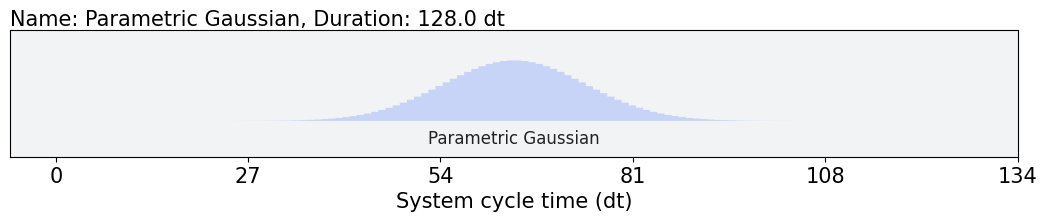

In [129]:
gaussian = pulse.library.Gaussian(num_samples, amp, sigma,
                              name="Parametric Gaussian")
gaussian.draw()

In [ ]:
## part 2 - Backend and build a series of pulses

## Figuring out how to initialize a backend to create a pulse simulation for a circuit (Bell state) 
    ## ( |00> + |11> ) / sqrt(2)

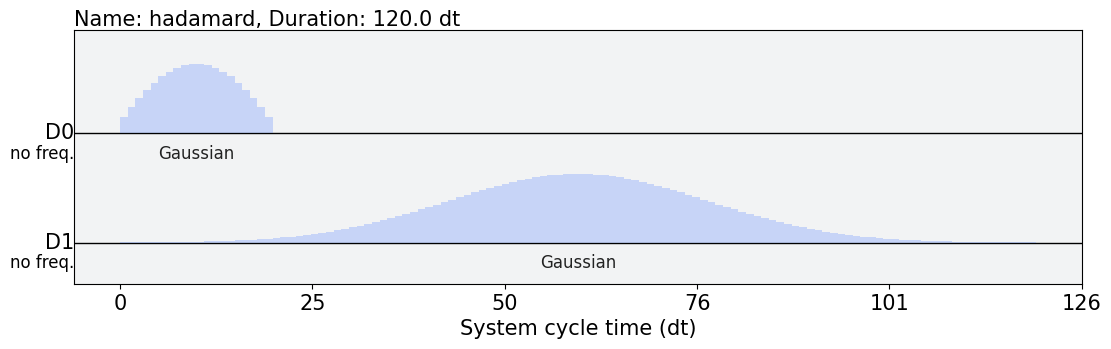

In [130]:
# Choose a backend for the pulse simulation
backend = FakeValenciaV2()

# Create a pulse schedule for the Bell state
schedule = pulse.Schedule()

# Define qubits and pulses
qubit_0 = 0
qubit_1 = 1

# Define pulse parameters
duration = 200  # duration of the pulse in time units
amp = 0.5      # amplitude of the pulse

#Hadamard pulse for q0
#play --> play(pulse,channel) which applies a pulse on the given channel
#build --> 
with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=120, amp=0.51, sigma=17), pulse.drive_channel(1))
    pulse.play(Gaussian(duration=20, amp=0.1, sigma=16), pulse.drive_channel(0))
 #   pulse.play(Gaussian(duration=12, amp=0.51, sigma=16), pulse.drive_channel(1))
h_q0.draw()

In [ ]:
## Playing with Drive channel function -> drives single-qubit rotations

In [131]:
from qiskit.pulse import DriveChannel
channel = DriveChannel(0)

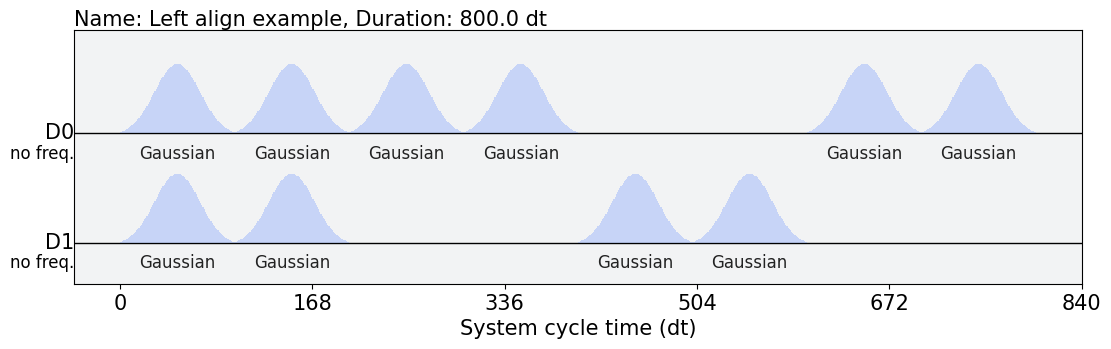

In [132]:
with pulse.build(backend, name='Left align example') as program:
    with pulse.align_left():
        gaussian_pulse = library.Gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
    with pulse.align_sequential():
        gaussian_pulse = library.Gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
program.draw()

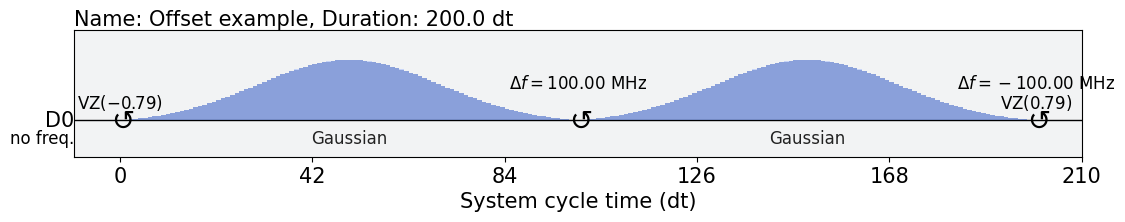

In [133]:
with pulse.build(backend, name='Offset example') as program:
    with pulse.phase_offset(3.14/4, pulse.drive_channel(0)):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        with pulse.frequency_offset(100e6, pulse.drive_channel(0)):
            pulse.play(gaussian_pulse, pulse.drive_channel(0))
 
program.draw()

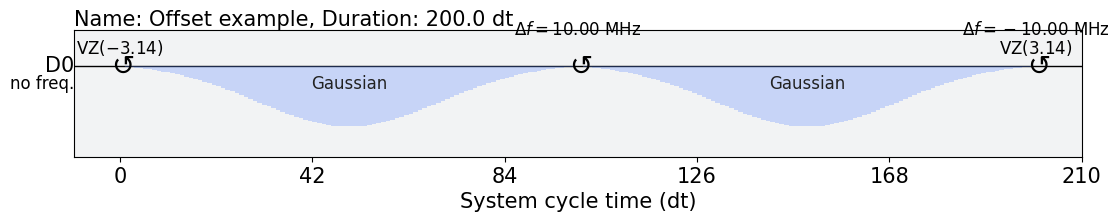

In [134]:
#arrow --> frame change
with pulse.build(backend, name='Offset example') as program:
    with pulse.phase_offset(3.14, pulse.drive_channel(0)):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        with pulse.frequency_offset(10e6, pulse.drive_channel(0)):
            pulse.play(gaussian_pulse, pulse.drive_channel(0))
 
program.draw()

In [ ]:
#### part 3 Complex Example

# Unclear what is happening so focused on simpler case -> bell state

C:\Users\mcniv\AppData\Local\Temp\ipykernel_15164\1871352029.py:8: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_15164\1871352029.py:8: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and

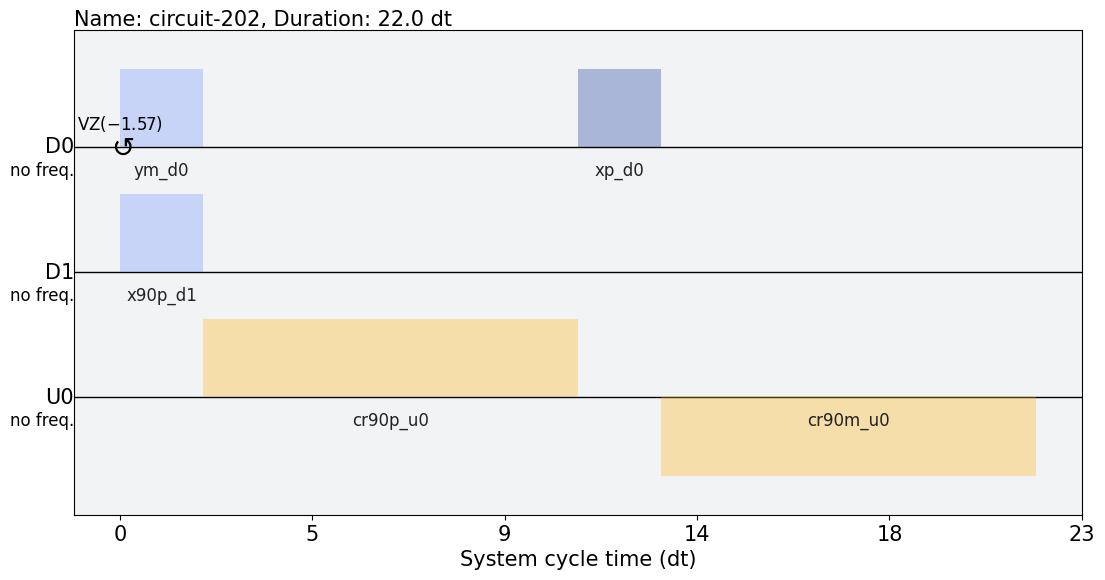

In [135]:
import math
from qiskit.compiler import schedule
 
from qiskit import pulse, QuantumCircuit
from qiskit.pulse import library
from qiskit.providers.fake_provider import FakeOpenPulse2Q
 
backend = FakeOpenPulse2Q()
 
qc = QuantumCircuit(2, 2)
qc.cx(0, 1)
 
with pulse.build(backend) as pulse_prog:
    # Create a pulse.
    gaussian_pulse = library.Gaussian(10, 1.0, 2)
    # Get the qubit's corresponding drive channel from the backend. gaussian_pulse = library.Gaussian(100, 0.5, 20)
    d0 = pulse.drive_channel(0)
    d1 = pulse.drive_channel(1)
    # Play a pulse at t=0.
    pulse.play(gaussian_pulse, d0)
    # Play another pulse directly after the previous pulse at t=10.
    pulse.play(gaussian_pulse, d0)
    # The default scheduling behavior is to schedule pulses in parallel
    # across channels. For example, the statement below
    # plays the same pulse on a different channel at t=0.
    pulse.play(gaussian_pulse, d1)
 
    # We also provide pulse scheduling alignment contexts.
    # The default alignment context is align_left.
 
    # The sequential context schedules pulse instructions sequentially in time.
    # This context starts at t=10 due to earlier pulses above.
    with pulse.align_sequential():
        pulse.play(gaussian_pulse, d0)
        # Play another pulse after at t=20.
        pulse.play(gaussian_pulse, d1)
 
        # We can also nest contexts as each instruction is
        # contained in its local scheduling context.
        # The output of a child context is a context-schedule
        # with the internal instructions timing fixed relative to
        # one another. This is schedule is then called in the parent context.
 
        # Context starts at t=30.
        with pulse.align_left():
            # Start at t=30.
            pulse.play(gaussian_pulse, d0)
            # Start at t=30.
            pulse.play(gaussian_pulse, d1)
        # Context ends at t=40.
 
        # Alignment context where all pulse instructions are
        # aligned to the right, ie., as late as possible.
        with pulse.align_right():
            # Shift the phase of a pulse channel.
            pulse.shift_phase(math.pi, d1)
            # Starts at t=40.
            pulse.delay(100, d0)
            # Ends at t=140.
 
            # Starts at t=130.
            pulse.play(gaussian_pulse, d1)
            # Ends at t=140.
 
        # Acquire data for a qubit and store in a memory slot.
        pulse.acquire(100, 0, pulse.MemorySlot(0))
 
        # We also support a variety of macros for common operations.
 
        # Measure all qubits.
        pulse.measure_all()
 
        # Delay on some qubits.
        # This requires knowledge of which channels belong to which qubits.
        # delay for 100 cycles on qubits 0 and 1.
        pulse.delay_qubits(100, 0, 1)
 
        # Call a schedule for a quantum circuit thereby inserting into
        # the pulse schedule.
        qc = QuantumCircuit(2, 2)
        qc.cx(0, 1)
        qc_sched = schedule(qc, backend)
        pulse.call(qc_sched)
 
 
        # It is also be possible to call a preexisting schedule
        tmp_sched = pulse.Schedule()
        tmp_sched += pulse.Play(gaussian_pulse, d0)
        pulse.call(tmp_sched)
 
        # We also support:
 
        # frequency instructions
        pulse.set_frequency(5.0e9, d0)
 
        # phase instructions
        pulse.shift_phase(0.1, d0)
 
        # offset contexts
        with pulse.phase_offset(math.pi, d0):
            pulse.play(gaussian_pulse, d0)
qc_sched.draw()

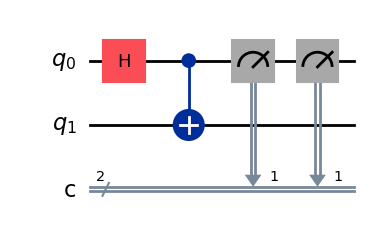

In [155]:
from qiskit.pulse.library import Gaussian
from qiskit import schedule
duration=128
amp=0.2
sigma=16
gaussian_pulse=Gaussian(duration,amp,sigma)
qc=QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,0],[1,1])
qc.draw('mpl')

In [150]:
### Make this into pulses
    # need to transpile (rewrite the input circuit to match the hardware topology)
    # Here using backend=FakeOpenPulse2Q

In [156]:
backend = FakeOpenPulse2Q()

C:\Users\mcniv\AppData\Local\Temp\ipykernel_15164\3637742596.py:1: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.GateConfig`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend = FakeOpenPulse2Q()
C:\Users\mcniv\AppData\Local\Temp\ipykernel_15164\3637742596.py:1: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.PulseBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow  and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and

In [157]:
qc=transpile(qc,backend)
print(backend)
qc.draw()

fake_openpulse_2q


C:\Users\mcniv\AppData\Local\Temp\ipykernel_15164\3794517749.py:1: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_openpulse_2q ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  qc=transpile(qc,backend)


┌─────────┐     ┌─┐┌─┐
q_0 -> 0 ┤ U2(0,π) ├──■──┤M├┤M├
         └─────────┘┌─┴─┐└╥┘└╥┘
q_1 -> 1 ───────────┤ X ├─╫──╫─
                    └───┘ ║  ║ 
    c: 2/═════════════════╩══╩═
                          1  1

In [158]:
scheduled=schedule(qc,backend)

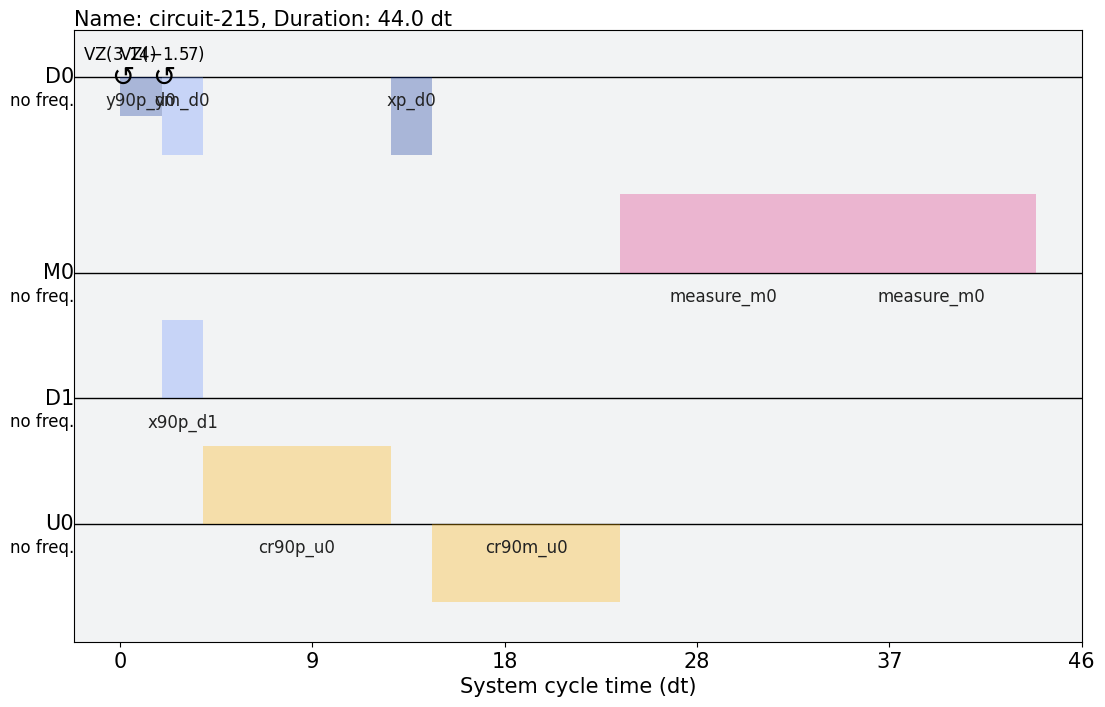

In [159]:
schedule(qc,backend).draw()

In [160]:
from qiskit.providers.fake_provider import GenericBackendV2
backend=GenericBackendV2(num_qubits=6, calibrate_instructions=True)
qc=transpile(qc,backend)
print(backend)
qc.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐     ┌─┐┌─┐
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤M├┤M├
               └─────────┘└────┘└─────────┘┌─┴─┐└╥┘└╥┘
      q_1 -> 1 ────────────────────────────┤ X ├─╫──╫─
                                           └───┘ ║  ║ 
ancilla_0 -> 2 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_1 -> 3 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_2 -> 4 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_3 -> 5 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
          c: 2/══════════════════════════════════╩══╩═
                                                 1  1

In [161]:
scheduled=schedule(qc,backend)

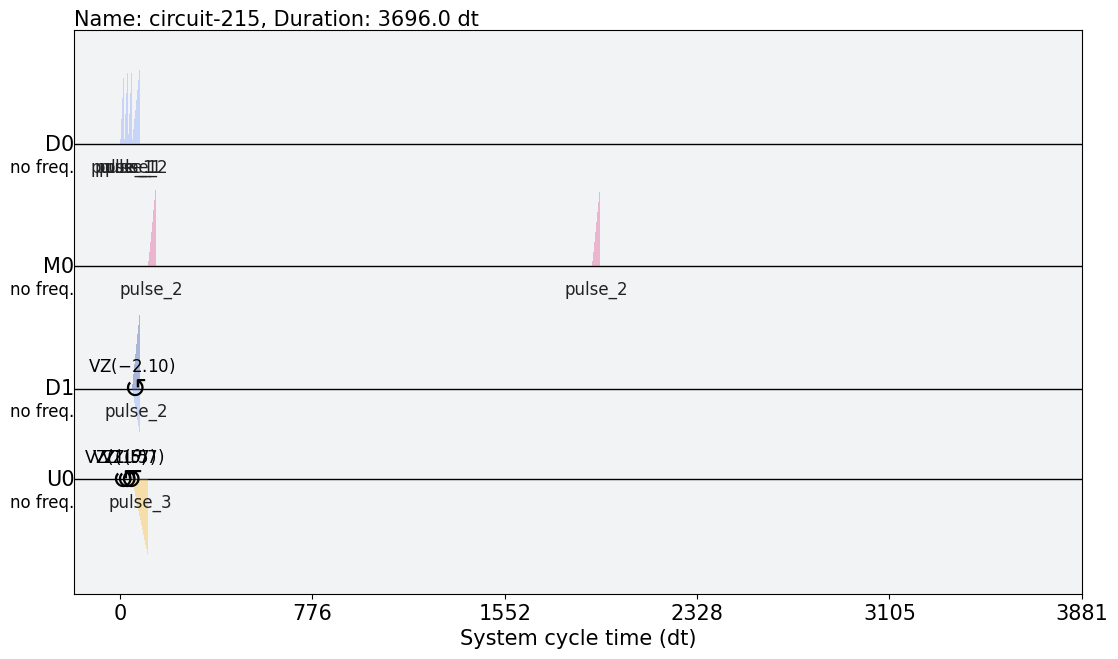

In [162]:
schedule(qc,backend).draw()

In [164]:
#### Questions to be answered:

    # 1. Understand fundamentals -> What do standard gates look when converted to pulses? What are their parameter dependencies?
    # 2. Functions always depend on G / G^2 functions -> What do they look like?
    # 3. Can simulate pulses but now need to understand how the measurement process occurs
    # 4. From above, topology drastically changes pulse structure. What is the IBM Eagle fake provider?

#### After going through arbitrary examples, best idea is to generate answers to 1. and 2. The documentation is not very good, so this type of document
#### will be immensely useful for anyone else starting with pulse circuits. This will also give us a good idea on how to implement pulses into PQCs.

#### Still working through the literature sent to us. While I read, I think the above idea should be the priority so we can fully understand how to apply
#### pulses in PQCs